<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I8kDikouqpH4hf7JBiSYAeNT2IO52T-T" width=600 height=480/></p>
<h3 style="text-align: center;"><b>–®–∫–æ–ª–∞ –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –§–ü–ú–ò –ú–§–¢–ò</b></h3>

<h3 style="text-align: center;"><b>–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Generative adversarial networks</b></h3>



–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤—ã –æ–±—É—á–∏—Ç–µ GAN –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ª–∏—Ü–∞ –ª—é–¥–µ–π –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ç–æ, –∫–∞–∫ –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏

In [1]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch
import torch.nn as nn
import cv2
from tqdm.notebook import tqdm
from torchvision.utils import save_image
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid', font_scale=1.2)

## –ß–∞—Å—Ç—å 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö (1 –±–∞–ª–ª)

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –≤–æ–∑—å–º–µ–º —á–∞—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–∞ [Flickr Faces](https://github.com/NVlabs/ffhq-dataset), –∫–æ—Ç–æ—Ä—ã–π —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª–∏—Ü –ª—é–¥–µ–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (1024—Ö1024). –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π, –ø–æ—ç—Ç–æ–º—É –º—ã –≤–æ–∑—å–º–µ–º –µ–≥–æ —á–∞—Å—Ç—å. –°–∫–∞—á–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –º–æ–∂–Ω–æ [–∑–¥–µ—Å—å](https://www.kaggle.com/datasets/tommykamaz/faces-dataset-small?resource=download-directory) –∏  [–∑–¥–µ—Å—å](https://drive.google.com/drive/folders/14H7LQWzd09SaM11oLfGtd455sWH2rmRW?usp=share_link)

–î–∞–≤–∞–π—Ç–µ –∑–∞–≥—Ä—É–∑–∏–º –Ω–∞—à–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç—Ä–æ–∏—Ç DataLoader –¥–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –ø—Ä–∏ —ç—Ç–æ–º –º–µ–Ω—è—è –∏—Ö —Ä–∞–∑–º–µ—Ä –¥–æ –Ω—É–∂–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è (—Ä–∞–∑–º–µ—Ä 1024 —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π, –ø–æ—ç—Ç–æ–º—É –º—ã —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º –≤–∑—è—Ç—å —Ä–∞–∑–º–µ—Ä 128 –ª–∏–±–æ –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ)

<hr>
<h3>–î–ª—è –Ω–∞—á–∞–ª–∞ —è –¥–æ–±–∞–≤–∏–ª –∞—Ä—Ö–∏–≤ —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º –∫ —Å–µ–±–µ –Ω–∞ Google Drive. –î–∞–ª–µ–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–ª –º–µ—Ç–æ–¥ –ø–æ –ø–æ–ª—É—á–µ–Ω–∏—é –æ–±—ä–µ–∫—Ç–∞ data loader —Å –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–º–∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏.</h3>

<hr>
<p>–ü–æ–ª—É—á–∞—é –¥–æ—Å—Ç—É–ø –∫ –∞—Ä—Ö–∏–≤—É –∏ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä—É—é –µ–≥–æ</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sample_dir = 'data_gan'
os.makedirs(sample_dir, exist_ok=True)

In [4]:
!unzip "/content/drive/MyDrive/Colab Notebooks/GUN/archive.zip" -d '/content/data_gan/'

Archive:  /content/drive/MyDrive/Colab Notebooks/GUN/archive.zip
  inflating: /content/data_gan/faces_dataset_small/00055.png  
  inflating: /content/data_gan/faces_dataset_small/00237.png  
  inflating: /content/data_gan/faces_dataset_small/00240.png  
  inflating: /content/data_gan/faces_dataset_small/00241.png  
  inflating: /content/data_gan/faces_dataset_small/00242.png  
  inflating: /content/data_gan/faces_dataset_small/00243.png  
  inflating: /content/data_gan/faces_dataset_small/00244.png  
  inflating: /content/data_gan/faces_dataset_small/00245.png  
  inflating: /content/data_gan/faces_dataset_small/00246.png  
  inflating: /content/data_gan/faces_dataset_small/00247.png  
  inflating: /content/data_gan/faces_dataset_small/00248.png  
  inflating: /content/data_gan/faces_dataset_small/00249.png  
  inflating: /content/data_gan/faces_dataset_small/00253.png  
  inflating: /content/data_gan/faces_dataset_small/00255.png  
  inflating: /content/data_gan/faces_dataset_small/00

<hr>
<h3>–†–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—é –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –º–µ—Ç–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –Ω–∞–º –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –æ–±—ä–µ–∫—Ç data loader. –ù–∞–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ –ø—Ä–æ–∏–∑–≤–æ–∂—É –Ω—É–∂–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø–æ—Å–ª–µ —á–µ–≥–æ —É–∂–µ –∑–∞–≥—Ä—É–∂–∞—é –≤ DataLoader</h3>

In [5]:
def get_dataloader(image_size, batch_size):
  """
  Builds dataloader for training data.
  Use tt.Compose and tt.Resize for transformations
  :param image_size: height and wdith of the image
  :param batch_size: batch_size of the dataloader
  :returns: DataLoader object 
  """
  # TODO: resize images, convert them to tensors and build dataloader
  
  INP_DIR = '/content/data_gan'

  transform_img = tt.Compose([
      tt.Resize(image_size),
      tt.CenterCrop(image_size),
      tt.ToTensor(),
      tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  data_set = ImageFolder(root=INP_DIR, transform=transform_img)
  
  data_loader = DataLoader(data_set, batch_size, shuffle=True, num_workers=2)

  return data_loader

In [6]:
#TODO: build dataloader and transfer it to device
image_size = 128
batch_size = 32

train_dl = get_dataloader(image_size, batch_size)

<hr>
<h3>–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞. –í—ã–≤–µ–¥–∏–º –±–∞—Ç—á –∫–∞—Ä—Ç–∏–Ω–æ–∫ (32 —à—Ç.)</h3>

In [7]:
def denorm(img_tensors):
    return img_tensors * 0.5 + 0.5

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(13, 13))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

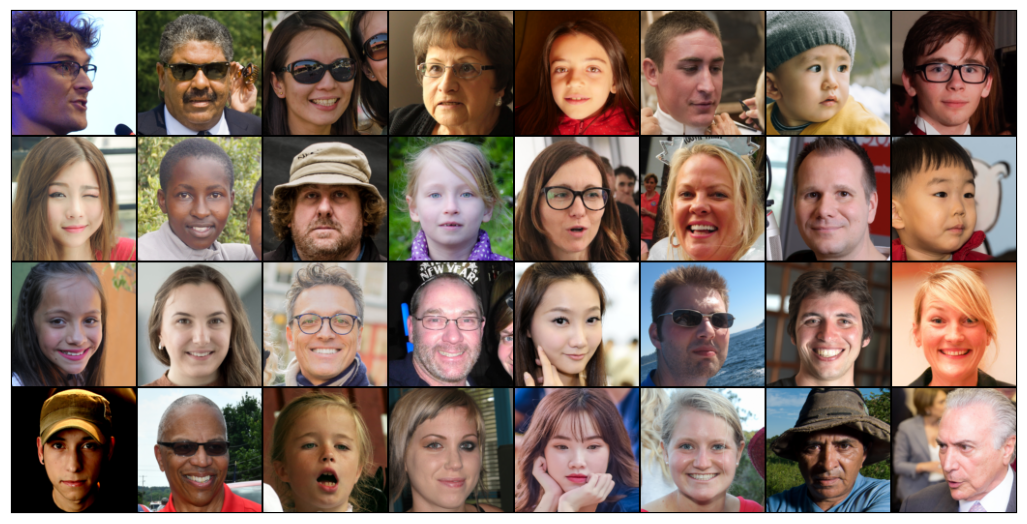

In [8]:
show_batch(train_dl)

## –ß–∞—Å—Ç—å 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (2 –±–∞–ª–ª–∞)

–°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–π—Ç–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä. –ü–æ–º–Ω–∏—Ç–µ, —á—Ç–æ:
* –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (—Ç–µ–Ω–∑–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ `3 x image_size x image_size`) –∏ –≤—ã–¥–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–∞—Å—Ç–æ—è—â–µ–µ (—Ç–µ–Ω–∑–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ 1)

* –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Ç–µ–Ω–∑–æ—Ä —à—É–º–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ `latent_size x 1 x 1` –∏ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ `3 x image_size x image_size`

In [9]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}.")

Device: cuda.


<hr>
<h3>–¢—É—Ç –±—É–¥–µ—Ç —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω—ã –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –ø—Ä–∏ –ø–æ–º–æ—â–∏: Conv2d, LeakyReLU, BatchNorm2d, ConvTranspose2d, ReLU. –§—É–Ω–∫—Ü–∏—è–º–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –±—É–¥—É—Ç –≤—ã—Å—Ç—É–ø–∞—Ç—å —Å–∏–≥–º–æ–∏–¥–∞ –∏ –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∏–π —Ç–∞–Ω–≥–µ–Ω—Å.</h3>
<hr>
<p>–†–∞–∑–º–µ—Ä –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤—ã–±–µ—Ä—É = 100</p>

In [10]:
discriminator = nn.Sequential(
    
    # in: 3 x 128 x 128
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 64 x 64

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 32 x 32

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 16 x 16

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 8 x 8
    
    nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(1024),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 1024 x 4 x 4

    nn.Conv2d(1024, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Sigmoid()
)

In [11]:
latent_size = 100 # choose latent size

generator = nn.Sequential(
    # in: 128 x 1 x 1

    nn.ConvTranspose2d(latent_size, 1024, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(1024),
    nn.ReLU(True),
    # out: 1024 x 4 x 4
    
    nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 8 x 8

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 16 x 16

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 32 x 32

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 64 x 64

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    # out: 3 x 128 x 128

    nn.Tanh()
)

–ü–µ—Ä–µ–π–¥–µ–º —Ç–µ–ø–µ—Ä—å –∫ –æ–±—É—á–µ–Ω–∏—é –Ω–∞—à–µ–≥–æ GAN–∞. –ê–ª–≥–æ—Ä–∏—Ç–º –æ–±—É—á–µ–Ω–∏—è —Å–ª–µ–¥—É—é—â–∏–π:
1. –£—á–∏–º –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä:
  * –±–µ—Ä–µ–º —Ä–µ–∞–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 1
  * –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 0
  * –æ–±—É—á–∞–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞

2. –£—á–∏–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä:
  * –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 0
  * –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–æ—Ä–æ–º, —Ä–µ–∞–ª—å–Ω–æ–µ —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–ª–∏ –Ω–µ—Ç


–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –±–µ—Ä–µ–º –±–∏–Ω–∞—Ä–Ω—É—é –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—é

<hr>
<h2>–¢–µ–ø–µ—Ä—å –ø–æ–ª—É—á—É –æ–±—ä–µ–∫—Ç—ã –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞ –∏ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞, –∏—Ö –æ–ø—Ç–∏–º–∞–π–∑–µ—Ä—ã –∏ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å. –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞–º–∏ –±—É–¥—É—Ç Adam, –∞ —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å –≤—ã—Å—Ç—É–ø–∏—Ç—å BCELoss.<h2>
<hr>
<p>Learning rate –≤—ã–±–µ—Ä—É —Ä–∞–≤–Ω—ã–º 0.0002.</p>

In [12]:
lr = 2e-4

gunD = discriminator.to(device)
gunG = generator.to(device)

criterion = nn.BCELoss()

optimizerD = torch.optim.Adam(discriminator.parameters(), 
                              lr=lr, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(generator.parameters(),
                              lr=lr, betas=(0.5, 0.999))

<hr>
<h3>–¢–µ–ø–µ—Ä—å —Ä–µ–∞–ª–∏–∑—É—é –º–µ—Ç–æ–¥ –æ–±—É—á–µ–Ω–∏—è –≥–¥–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—Å—è –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ —Å –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–∏ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ–≥–æ –ø—Ä–æ–≥—Ä–µ—Å—Å–∞.</h3>
<hr>

In [13]:
def fit(mod_discriminator, mod_generator, opt_discriminator, opt_generator, criterion, epochs, lr):
  # Losses & scores
  losses_g = []
  losses_d = []
  real_scores = []
  fake_scores = []
    
  for epoch in range(epochs):
      loss_d_per_epoch = []
      loss_g_per_epoch = []
      real_score_per_epoch = []
      fake_score_per_epoch = []

      for real_images, _ in tqdm(train_dl):
          # Train discriminator
          mod_discriminator.zero_grad()

          real_images = real_images.to(device)
          batch_s = real_images.size(0)

          label = torch.full((batch_s, ), 1, dtype=torch.float, device=device)
          real_preds = mod_discriminator(real_images).view(-1)
          real_loss = criterion(real_preds, label)
          cur_real_score = torch.mean(real_preds).item()
          real_loss.backward()

          # Generate fake images
          latent = torch.randn(batch_s, latent_size, 1, 1, device=device)
          fake_images = mod_generator(latent)

          # Pass fake images through discriminator
          label.fill_(0)
          fake_preds = mod_discriminator(fake_images.detach()).view(-1)
          fake_loss = criterion(fake_preds, label)
          fake_loss.backward()
          cur_fake_score = torch.mean(fake_preds).item()

          real_score_per_epoch.append(cur_real_score)
          fake_score_per_epoch.append(cur_fake_score)

          # Update discriminator weights
          loss_d = real_loss + fake_loss
          opt_discriminator.step()
          loss_d_per_epoch.append(loss_d.item())

          # Train generator
          mod_generator.zero_grad()
          label.fill_(1)

          # Try to fool the discriminator
          preds = mod_discriminator(fake_images).view(-1)
          loss_g = criterion(preds, label)
          loss_g.backward()
          
          # Update generator weights
          loss_g_per_epoch.append(loss_g.item())
          opt_generator.step()
          
      # Record losses & scores
      losses_g.append(np.mean(loss_g_per_epoch))
      losses_d.append(np.mean(loss_d_per_epoch))
      real_scores.append(np.mean(real_score_per_epoch))
      fake_scores.append(np.mean(fake_score_per_epoch))

      with torch.no_grad():
        z = torch.randn(batch_size, latent_size, 1, 1, device=device)
        fake_images = mod_generator(z)
        save_image(denorm(fake_images).view(fake_images.size(0), 3, 128, 128), f"generated_images_{epoch+1}.png")
      
      # Log losses & scores (last batch)
      print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
          epoch+1, epochs, 
          losses_g[-1], losses_d[-1], real_scores[-1], fake_scores[-1]))
      
  return losses_g, losses_d, real_scores, fake_scores, mod_discriminator, mod_generator

<hr>
<p>–ù–∏–∂–µ —è –∑–∞–≥—Ä—É–∂–∞—é —É–∂–µ —Ä–∞–Ω–µ–µ –æ–±—É—á–µ–Ω–Ω—ã–π –º–Ω–æ—é –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –∏ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä. –í—Å–µ–≥–æ —É –º–µ–Ω—è –µ—Å—Ç—å 6 –º–æ–¥–µ–ª–µ–π: 50,70,80,90,100 –∏ 110. –¢–∞–∫ –∂–µ –∑–∞–≥—Ä—É–∂–∞—é –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è. –ü—Ä–æ—Å—Ç–æ –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –º–Ω–µ –ª–µ–≥—á–µ –±—ã–ª–æ –ø–µ—Ä–µ–∑–∞–ø—É—Å—Ç–∏—Ç—å colab —á–µ–º –æ—á–∏—â–∞—Ç—å –µ–≥–æ.</p>

In [14]:
checkpoint = torch.load('/content/drive/MyDrive/models_110.pth')
gunD.load_state_dict(checkpoint['discriminator'])
gunG.load_state_dict(checkpoint['generator'])

<All keys matched successfully>

In [15]:
data = torch.load('/content/drive/MyDrive/data_110.pth')
losses_g_110 = data['losses_g']
losses_d_110 = data['losses_d']
real_scores_110 = data['real_scores']
fake_scores_110 = data['fake_scores']

<hr>
<h2>–û–±—É—á–µ–º –∂–µ –Ω–∞—à–µ –∏–∑–¥–µ–ª–∏–µ!</h2>

In [ ]:
losses_g, losses_d, real_scores, fake_scores, trained_discriminator, trained_generator = fit(gunD, gunG, optimizerD, optimizerG, criterion, 10, lr)

  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [1/10], loss_g: 7.6455, loss_d: 0.1348, real_score: 0.9540, fake_score: 0.0431


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [2/10], loss_g: 7.4841, loss_d: 0.2255, real_score: 0.9549, fake_score: 0.0524


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [3/10], loss_g: 7.5663, loss_d: 0.0714, real_score: 0.9729, fake_score: 0.0259


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [4/10], loss_g: 9.7180, loss_d: 0.1539, real_score: 0.9578, fake_score: 0.0406


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [5/10], loss_g: 8.6273, loss_d: 0.2062, real_score: 0.9475, fake_score: 0.0532


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [6/10], loss_g: 8.4781, loss_d: 0.1055, real_score: 0.9649, fake_score: 0.0347


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [7/10], loss_g: 7.6398, loss_d: 0.0533, real_score: 0.9778, fake_score: 0.0217


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [8/10], loss_g: 9.1176, loss_d: 0.0818, real_score: 0.9727, fake_score: 0.0271


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [9/10], loss_g: 10.1473, loss_d: 0.3046, real_score: 0.9362, fake_score: 0.0638


  0%|          | 0/99 [00:00<?, ?it/s]

Epoch [10/10], loss_g: 9.1865, loss_d: 0.0982, real_score: 0.9663, fake_score: 0.0344


p.s.: –∑–¥–µ—Å—å –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –ø–æ—Å–ª–µ–¥–Ω—è—è –º–æ–¥–µ–ª—å —Å–æ 110 —ç–ø–æ—Ö–∞–º–∏ –≤ —Å—É–º–º–µ.

In [ ]:
gunD = trained_discriminator
gunG = trained_generator

In [16]:
trained_discriminator = gunD
trained_generator = gunG

In [ ]:
losses_g_110 = losses_g_110 + losses_g
losses_d_110 = losses_d_110 + losses_d
real_scores_110 = real_scores_110 + real_scores
fake_scores_110 = fake_scores_110 + fake_scores

<p>–ó–¥–µ—Å—å —è —Å–æ–≤–º–µ—â–∞—é –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –æ–±—É—á–µ–Ω–∏–π —Å –Ω—ã–Ω–µ—à–Ω–∏–º–∏.</p>
<hr>

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ª–æ—Å—Å–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞. –ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ —ç—Ç–∏ –≥—Ä–∞—Ñ–∏–∫–∏?

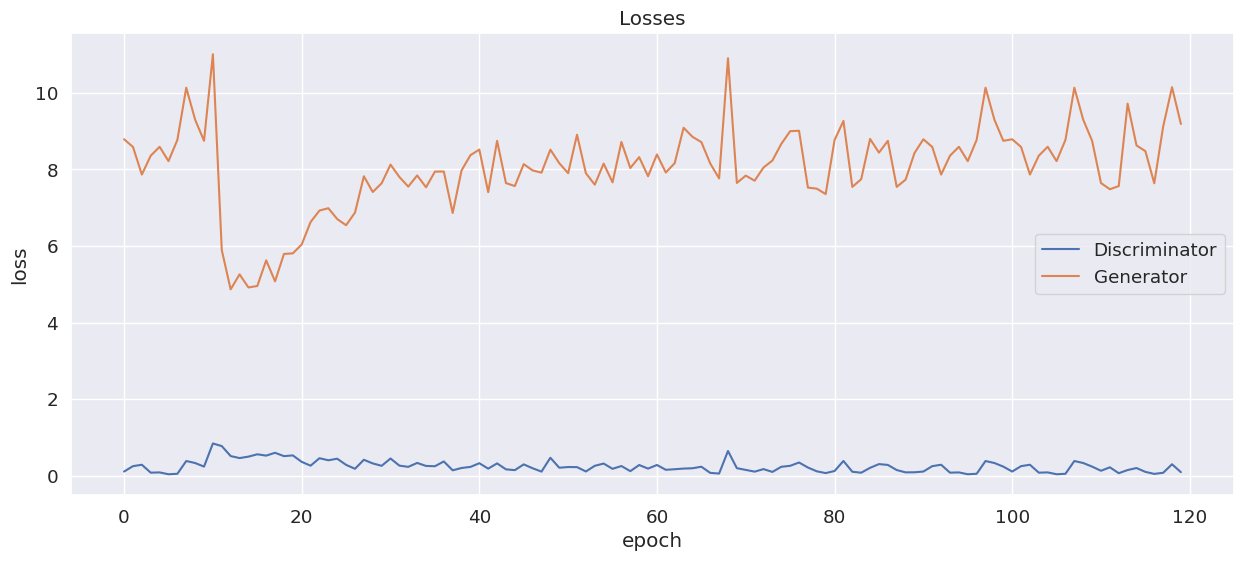

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(losses_d_110, '-')
plt.plot(losses_g_110, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

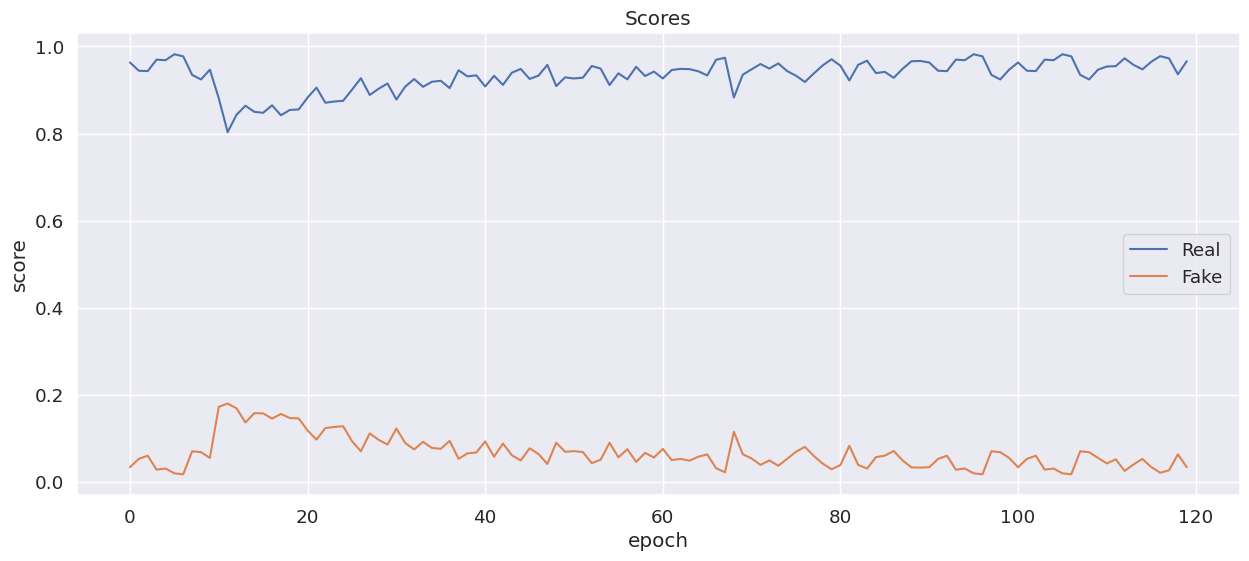

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(real_scores_110, '-')
plt.plot(fake_scores_110, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');

<p>–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –∏–∑-–∑–∞ –ø—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏ –º–µ–∂–¥—É –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–æ–º –∏ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ —Ñ—ç–π–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∫ –∫–ª–∞—Å—Å—É 1-–Ω —Å –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–æ–π —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ 0-–ª—é, –∞ —É —Ä–µ–∞–ª—å–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∫ 1-—Ü–µ.<br>–¢–∞–∫ –∂–µ —É –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ loss –≤ —Å–∞–º–æ–º –Ω–∞—á–∞–ª–µ —Ä–µ–∑–∫–æ –ø–∞–¥–∞–µ—Ç, –ø–æ—Å–ª–µ —á–µ–≥–æ –∏–∑-–∑–∞ –±–æ—Ä—å–±—ã —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è, –∫–∞–∫ –∏ —É –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞.<br>–¢–æ –µ—Å—Ç—å –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞–ª–∏—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –∏ –Ω–∞–±–ª—é–¥–∞–ª—Å—è –ø—Ä–æ–≥—Ä–µ—Å—Å. –ù–æ —á–µ–º –¥–∞–ª—å—à–µ –æ–Ω–∏ —É—á–∞—Ç—Å—è, —Ç–µ–º –º–µ–¥–ª–µ–Ω–Ω–µ–µ —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –ø—Ä–æ–≥—Ä–µ—Å—Å.</p>
<hr>

## –ß–∞—Å—Ç—å 3. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (1 –±–∞–ª–ª)

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –æ—Ü–µ–Ω–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–≤–æ–¥–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞—à–∏–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º

<hr>
<h2>–ó–¥–µ—Å—å —è —Ä–µ–∞–ª–∏–∑–æ–≤–∞–ª –ø–æ–ª—É—á–µ–Ω–∏–µ –∏–∑ —Ä–∞–Ω–¥–æ–º–Ω–æ–≥–æ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —á–µ—Ä–µ–∑ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –Ω–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ.</h2>

In [ ]:
n_images = 4

fixed_latent = torch.randn(n_images, latent_size, 1, 1, device=device)
fake_images = gunG(fixed_latent)

In [ ]:
def show_images(generated):
  # TODO: show generated images
  fig, axes = plt.subplots(nrows=1, ncols=generated.shape[0], figsize=(10, 5))
  for i, ax in enumerate(axes):
    img = np.transpose(generated[i].detach().cpu().numpy(), (1, 2, 0))
    img = (img + 1) / 2  # –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–∑ [-1, 1] –≤ [0, 1]
    ax.imshow(img)
    ax.axis('off')
  plt.show()  

In [ ]:
print(fake_images.shape)

torch.Size([4, 3, 128, 128])


<h3>–ù–∏–∂–µ –±—É–¥—É—Ç –ø–æ–∫–∞–∑–∞–Ω—ã –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, –Ω–∞—á–∏–Ω–∞—è —Å 70, –∑–∞–∫–∞–Ω—á–∏–≤–∞—è 110.</h3>

<hr>
<h3><b>70</b> —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è:</h3>

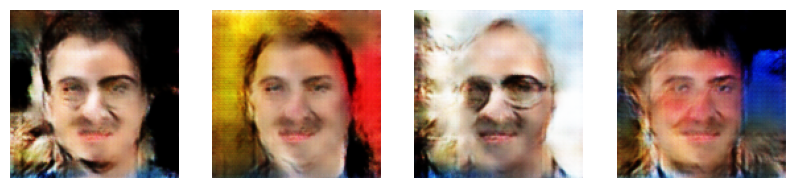

In [ ]:
show_images(fake_images.to('cpu'))

<hr>
<h3><b>80</b> —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è:</h3>

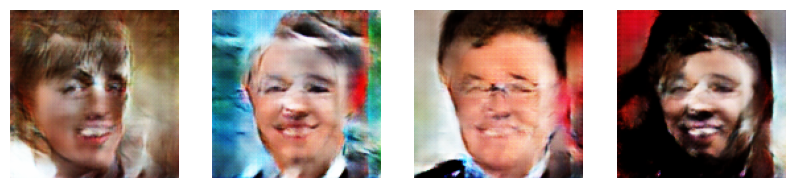

In [ ]:
show_images(fake_images.to('cpu'))

<hr>
<h3><b>90</b> —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è:</h3>

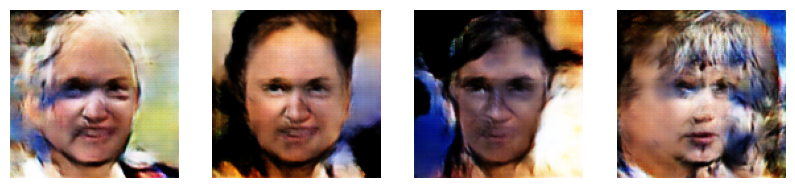

In [ ]:
show_images(fake_images.to('cpu'))

<hr>
<h3><b>100</b> —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è:</h3>

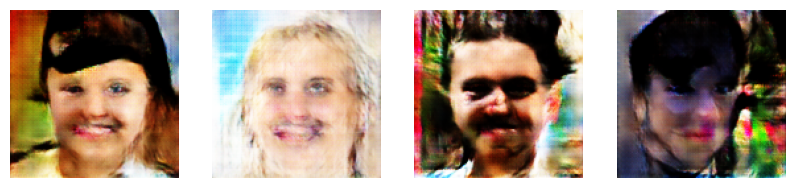

In [ ]:
show_images(fake_images.to('cpu'))

<hr>
<h3><b>110</b> —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è:</h3>

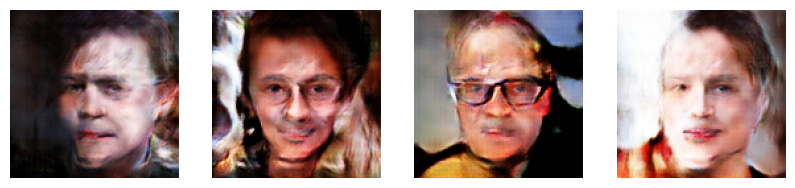

In [ ]:
show_images(fake_images.to('cpu'))

<hr>
<h3>–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –Ω–∞—É—á–∏–ª—Å—è –∏–∑ —Ñ–µ–π–∫–æ–≤–æ–≥–æ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–µ –ª–∏—Ü–∞, –Ω–æ —Å –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–∞–º–∏. –ù–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø—Ä–æ–±–ª–µ–º—ã —Å –≥–µ–Ω–µ—Ä–∞—Ü–∏–µ–π –∑–∞–¥–Ω–µ–≥–æ —Ñ–æ–Ω–∞, –∞ —Ç–∞–∫–∂–µ –∫–∞—á–µ—Å—Ç–≤–æ–º –ª–∏—Ü–∞. –ù–æ –≤—Å–µ –∂–µ –æ—Ç–º–µ—á—É, —á—Ç–æ –æ–Ω —É–º–µ–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –æ—Å–Ω–æ–≤–Ω—ã–µ —á–µ—Ä—Ç—ã –ª–∏—Ü–∞, –¥–∞–∂–µ –∏–Ω–æ–≥–¥–∞ –∞–∫—Å–µ—Å—Å—É–∞—Ä—ã –≤ –≤–∏–¥–µ –æ—á–∫–æ–≤. –î–ª—è —Å–∞–º–æ–π –ø—Ä–æ—Å—Ç–æ –º–æ–¥–µ–ª–∏ —ç—Ç–æ —Ö–æ—Ä–æ—à–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å.</h3>

<hr>
<p>–ó–¥–µ—Å—å —è —Å–æ—Ö—Ä–∞–Ω—è—é –º–æ–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã</p>

In [ ]:
torch.save({
    'discriminator': trained_discriminator.state_dict(),
    'generator': trained_generator.state_dict(),
}, 'models_110.pth')

In [ ]:
torch.save({
    
    'losses_g':  losses_g + losses_g_110,
    'losses_d':  losses_d + losses_d_110,
    'real_scores': real_scores + real_scores_110,
    'fake_scores': fake_scores + fake_scores_110,
}, 'data_110.pth')

–ö–∞–∫ –≤–∞–º –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π?

<hr>
<p>–ù–µ —Å–º–æ—Ç—Ä—è –Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ç—É –º–æ–¥–µ–ª–∏, –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å–æ —Å–≤–æ–µ–π –∑–∞–¥–∞—á–µ–π –∏ –º–æ–∂–µ—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —á—Ç–æ-—Ç–æ –ø–æ—Ö–æ–∂–µ–µ –Ω–∞ –ª–∏—Ü–æ —á–µ–ª–æ–≤–µ–∫–∞ —Å–æ–±–ª—é–¥–∞—è –≤—Å–µ –µ–≥–æ –æ—Å–Ω–æ–≤–Ω—ã–µ —á–µ—Ä—Ç—ã. –ù–∞–±–ª—é–¥–∞—é—Ç—Å—è –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç—ã, –∞ —Ç–∞–∫–∂–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –∑–∞–¥–Ω–∏–º —Ñ–æ–Ω–æ–º –∏–∑-–∑–∞ –ø—Ä–æ—Å—Ç–æ—Ç—ã –º–æ–¥–µ–ª–∏.</p>

## –ß–∞—Å—Ç—å 4. Leave-one-out-1-NN classifier accuracy (6 –±–∞–ª–ª–æ–≤)

### 4.1. –ü–æ–¥—Å—á–µ—Ç accuracy (4 –±–∞–ª–ª–∞)

–ù–µ –≤—Å–µ–≥–¥–∞ –±—ã–≤–∞–µ—Ç —É–¥–æ–±–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≥–ª–∞–∑–∞–º–∏. –í –∫–∞—á–µ—Å—Ç–≤–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã –≤–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –ø–æ–¥—Ö–æ–¥:
  * –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–æ–ª—å–∫–æ –∂–µ —Ñ–µ–π–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Å–∫–æ–ª—å–∫–æ –µ—Å—Ç—å –Ω–∞—Å—Ç–æ—è—â–∏—Ö –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –ü—Ä–∏—Å–≤–æ–∏—Ç—å —Ñ–µ–π–∫–æ–≤—ã–º –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞ 0, –Ω–∞—Å—Ç–æ—è—â–∏–º ‚Äì 1.
  * –ü–æ—Å—Ç—Ä–æ–∏—Ç—å leave-one-out –æ—Ü–µ–Ω–∫—É: –æ–±—É—á–∏—Ç—å 1NN Classifier (`sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)`) –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∫–ª–∞—Å—Å –Ω–∞ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–∞—Ö, –∫—Ä–æ–º–µ –æ–¥–Ω–æ–≥–æ, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ (accuracy) –Ω–∞ –æ—Å—Ç–∞–≤—à–µ–º—Å—è –æ–±—ä–µ–∫—Ç–µ. –í —ç—Ç–æ–º –≤–∞–º –ø–æ–º–æ–∂–µ—Ç `sklearn.model_selection.LeaveOneOut`

<hr>
<p>–ù–∞ —ç—Ç–æ–º —ç—Ç–∞–ø–µ —è —Ä–µ—à–∏–ª —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.</p>

In [ ]:
!zip -r '/content/trained_pictures_110.zip' '/content/trained_pictures/'

  adding: content/trained_pictures/ (stored 0%)
  adding: content/trained_pictures/generated_images_6.png (deflated 0%)
  adding: content/trained_pictures/generated_images_5.png (deflated 0%)
  adding: content/trained_pictures/generated_images_2.png (deflated 0%)
  adding: content/trained_pictures/generated_images_7.png (deflated 0%)
  adding: content/trained_pictures/generated_images_3.png (deflated 0%)
  adding: content/trained_pictures/generated_images_10.png (deflated 0%)
  adding: content/trained_pictures/generated_images_8.png (deflated 0%)
  adding: content/trained_pictures/.ipynb_checkpoints/ (stored 0%)
  adding: content/trained_pictures/generated_images_4.png (deflated 0%)
  adding: content/trained_pictures/generated_images_1.png (deflated 0%)
  adding: content/trained_pictures/generated_images_9.png (deflated 0%)


–í—Å–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –±—É–¥—É—Ç –≤—ã–ª–æ–∂–µ–Ω—ã –Ω–∞ <a href="https://github.com/VladMartinov/DL.GUN">git-—Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–∏</a> –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –æ–∑–Ω–∞–∫–æ–º–ª–µ–Ω–∏—è.
<hr>

<h2>–ó–¥–µ—Å—å —è –ø—Ä–æ–∏–∑–≤–µ–¥—É –ø–æ–¥—Å—á—ë—Ç accuracy —Å–≤–æ–µ–π –º–æ–¥–µ–ª–∏ –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—è—Å—å –≤—ã—à–µ —É–∫–∞–∑–∞–Ω–Ω–æ–º—É –ø–ª–∞–Ω—É.</h2>

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
n_images = 1600

fixed_latent = torch.randn(n_images, latent_size, 1, 1, device=device)
fake_images = trained_generator(fixed_latent)

In [19]:
reshaped_fake = fake_images.reshape(fake_images.shape[0], -1)

real_images = [i[0] for i in tqdm(train_dl)][:int(n_images/batch_size)]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 99/99 [02:06<00:00,  1.27s/it]


In [20]:
reshaped_real = torch.stack(real_images).reshape(fake_images.shape[0], -1)

In [21]:
assert reshaped_real.shape == reshaped_fake.shape

In [25]:
fake_labels = np.zeros(n_images)
real_labels = np.ones(n_images)
labels = np.concatenate([fake_labels, real_labels])

features = torch.concat([reshaped_fake.cpu(), reshaped_real.cpu()]).detach().numpy()

loo = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
%%time
# –û–±—É—á–∞–µ–º –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Å –ø–æ–º–æ—â—å—é leave-one-out –æ—Ü–µ–Ω–∫–∏
accuracies = []
for train_index, test_index in loo.split(features):
    print("\tTRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

	TRAIN: [   1    2    3 ... 3197 3198 3199] TEST: [0]
	TRAIN: [   0    2    3 ... 3197 3198 3199] TEST: [1]
	TRAIN: [   0    1    3 ... 3197 3198 3199] TEST: [2]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [3]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [4]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [5]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [6]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [7]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [8]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [9]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [10]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [11]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [12]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [13]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [14]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [15]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [16]
	TRAIN: [   0    1    2 ... 3197 3198 3199] TEST: [17]
	TRAIN: [   0    1  

In [27]:
mean_accuracy = np.mean(accuracies)
print("Accuracy:", mean_accuracy)

Accuracy: 0.8690625


–ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –ø–æ–ª—É—á–∏–≤—à–µ–º—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ? –ö–∞–∫–æ–π accuracy –º—ã —Ö–æ—Ç–µ–ª–∏ –±—ã –ø–æ–ª—É—á–∏—Ç—å –∏ –ø–æ—á–µ–º—É?

<p>–ü–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —è —Å—á–∏—Ç–∞—é –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π. –ë–æ–ª—å—à—É—é —á–∞—Å—Ç—å —Ñ–µ–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (–∞ –∏–º–µ–Ω–Ω–æ 1181 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–∑ 1600 —Ñ–µ–∫–æ–≤—ã—Ö) –æ–Ω —Ä–∞—Å–ø–æ–∑–Ω–∞–ª –∫–∞–∫ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –Ω–∞—à –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ —Ä–∞–Ω–¥–æ–º–Ω–æ–≥–æ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –Ω–∞—à –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –æ–±—É—á–∏–ª—Å—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∏ —Å–ø–æ—Å–æ–±–µ–Ω –≤–æ—Å—Å–æ–∑–¥–∞–≤–∞—Ç—å –ª–∏—Ü–∞ –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã–µ. –ö–æ–Ω–µ—á–Ω–æ –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ, –Ω–æ –¥–ª—è —Å–≤–æ–µ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ.</p>
<hr>

### 4.2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π (2 –±–∞–ª–ª–∞)

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø–æ—Ö–æ–∂–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞—Å—Ç–æ—è—â–∏—Ö –∏ —Ñ–µ–π–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –î–ª—è —ç—Ç–æ–≥–æ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å –º–µ—Ç–æ–¥–æ–º, —Å–Ω–∏–∂–∞—é—â–∏–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å (–∫ –ø—Ä–∏–º–µ—Ä—É, TSNE) –∏ –∏–∑–æ–±—Ä–∞–∑–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞–∑–Ω—ã–º —Ü–≤–µ—Ç–æ–º —Ç–æ—á–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Ä–µ–∞–ª—å–Ω—ã–º –∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–∏

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X)

<h3>–ù–∏–∂–µ –±—É–¥–µ—Ç –ø–æ–∫–∞–∑–∞–Ω–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞—á–∏–Ω–∞—è —Å –ø–æ—Å–ª–µ–¥–Ω–µ–π, –∑–∞–∫–∞–Ω—á–∏–≤–∞—è 70 —ç–ø–æ—Ö, –¥–ª—è –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.</h3>

<hr>
<h3><b>110</b> —ç–ø–æ—Ö:</h3>

In [ ]:
fig = px.scatter(tsne_results, x=0, y=1, color=y.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

<hr>
<h3><b>100</b> —ç–ø–æ—Ö:</h3>

In [ ]:
fig = px.scatter(tsne_results, x=0, y=1, color=y.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

<hr>
<h3><b>90</b> —ç–ø–æ—Ö:</h3>

In [ ]:
fig = px.scatter(tsne_results, x=0, y=1, color=y.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

<hr>
<h3><b>80</b> —ç–ø–æ—Ö:</h3>

In [ ]:
fig = px.scatter(tsne_results, x=0, y=1, color=y.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

<hr>
<h3><b>70</b> —ç–ø–æ—Ö:</h3>

In [ ]:
fig = px.scatter(tsne_results, x=0, y=1, color=y.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

–ü—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ –ø–æ–ª—É—á–∏–≤—à–∏–π—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç:

<hr>
<h2><b>–ü–æ–¥–≤–µ–¥—ë–º –∏—Ç–æ–≥–∏ –¥–æ–º–∞—â–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è</b></h2>
<hr>
<h2>–ü–æ–¥–≤–æ–¥—è –∏—Ç–æ–≥–∏ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –º–Ω–µ —É–∑–¥–∞–ª–æ—Å—å –æ–±—É—á–∏—Ç—å –ø—Ä–æ—Å—Ç–æ–π GUN, –∞ —Ç–∞–∫ –∂–µ —É–∑–Ω–∞—Ç—å –µ–≥–æ accuracy –∏ —É–≤–∏–¥–µ—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ–µ–π–∫–æ–≤—ã—Ö –∏ –æ–±—ã—á–Ω—ã—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏.</h2>
<hr>
<h3>–ò—Å—Ö–æ–¥—è –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ accuracy –º—ã —Ç–∞–∫ –∂–µ –º–æ–∂–µ–º —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –æ–±—É—á–∏–ª–∏—Å—å –∏ —Å–ø–æ—Å–æ–±–Ω—ã –≤–æ—Å—Å–æ–∑–¥–∞–≤–∞—Ç—å –∏–∑ —Ä–∞–Ω–¥–æ–º–Ω—ã—Ö –ª–∞—Ç–µ–Ω—Ç–Ω—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤ –ª–∏—Ü–∞ –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏–µ.</h3>
<hr>
<h4>–í—ã–ø–æ–ª–Ω–∏–≤ –∞–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏ –º–æ–∂–Ω–æ –≤—ã—è–≤–∏—Ç—å —Å–ª–µ–¥—É—é—â–µ–µ:</h4>
<ul>
  <li><p>–ù–∞ 90 –∏ 80 —ç–ø–æ—Ö–∞—Ö –Ω–∞—à–∏ —Ñ—ç–π–∫–æ–≤—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –¥–æ–≤–æ–ª—å–Ω–æ –ª–µ–≥–∫–æ –æ—Ç–ª–∏—á–∏—Ç—å –æ—Ç –Ω–∞—Å—Ç–æ—è—â–∏—Ö.</p></li>
  <li><p>–ù–∞ —É–¥–∏–≤–ª–µ–Ω–∏–µ, –Ω–∞ 70 —ç–ø–æ—Ö–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±—ã–ª –ª—É—á—à–µ. –¢—É—Ç —É–∂–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–∞—á–∞–ª–∏ —Å–º–µ—à–∏–≤–∞—Ç—å—Å—è –º–µ–∂–¥—É —Å–æ–±–æ–π, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞—à –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –Ω–∞—É—á–∏–ª—Å—è –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏ —Å—Ö–æ–∂–∏–µ —Å –Ω–∞—Å—Ç–æ—è—â–∏–º–∏.</p></li>
  <li><p>–ù–∞ 110 –∏ 100 —ç–ø–æ—Ö–∞—Ö –Ω–∞—à–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∞—á–∏–Ω–∞—é—Ç —Å–º–µ—à–∏–≤–∞—Ç—å—Å—è –ª—É—á—à–µ. –í—Å–µ –µ—â–µ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∏–¥–µ–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–æ—á–µ–∫, –≥–¥–µ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –æ—Ç–ª–∏—á–∏—Ç—å —Ñ–µ–π–∫ –æ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–π. –ù–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —è —Å—á–∏—Ç–∞—é –¥–æ—Å—Ç–æ–π–Ω—ã–π. –í–µ–¥—å —É–∂–µ —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è —Ç—Ä—É–¥–Ω–µ–µ –æ—Ç–ª–∏—á–∞—Ç—å –Ω–∞—Å—Ç–æ—è—â—É—é –æ—Ç —Ñ–µ–π–∫–∞.</p></li>
</ul>
<hr>
<h4>–î–∞–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–º —Å–ø–æ—Å–æ–±–æ–º. –í—ã–±—Ä–∞—Ç—å –¥—Ä—É–≥–æ–π –ª–æ—Å—Å –¥–æ–ø—É—Å—Ç–∏–º –Ω–µ BCELoss –∞ MSELoss, –∫–∞–∫ –±—ã–ª–æ —Å–∫–∞–∑–∞–Ω–æ –≤ –ª–µ–∫—Ü–∏–∏, —á—Ç–æ–±—ã –æ–Ω –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–ª –Ω–µ –æ–¥–Ω–æ –∏ —Ç–æ–∂–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞ —Ä–∞–∑–ª–∏—á–Ω—ã–µ. –¢.–∫. –µ—Å–ª–∏ –ø—Ä–∏—Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –Ω–∞ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Ç–æ –º—ã –º–æ–∂–µ–º –Ω–∞–±–ª—é–¥–∞—Ç—å, —á—Ç–æ –æ–Ω–∏ –≤ —á–µ–º-—Ç–æ —Å—Ö–æ–∂–∏. –ú–æ–∂–Ω–æ –µ—â–µ –¥—Ä—É–≥—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –¥–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –º–æ–≥–ª–∏ —Ö–æ—Ä–æ—à–æ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∑–∞–¥–Ω–∏–π —Ñ–æ–Ω, —Ç.–∫. —ç—Ç–∏ –º–æ–¥–µ–ª–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ–±—É—á–∞–µ—Ç—Å—è –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–∑ —à—É–º–∞ —á–µ—Ä—Ç—ã –ª–∏—Ü–∞, –∞ –≤–æ—Ç –∑–∞–¥–Ω–∏–π —Ñ–æ–Ω –æ–Ω–∞ –Ω–µ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –≤–æ–≤—Å–µ. –¢–∞–∫ –∂–µ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–∂–Ω–æ –µ—â–µ –¥–æ–±–∞–≤–∏—Ç—å –±—É—Ñ–µ—Ä, –±–æ–ª–µ–µ –±–æ–ª—å—à–µ –¥–∞—Ç–∞—Å–µ—Ç, –∞ —Ç–∞–∫ –∂–µ –º–æ–∂–Ω–æ –≤–æ–≤—Å–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥—É—é —Å–µ—Ç–∫—É –¥–ª—è –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞.</h4>
<hr>
<p>–†–µ–∑—É–ª—å—Ç–∞—Ç –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ –±—É–¥—É—Ç –ª–µ–∂–∞—Ç –Ω–∞ <a href="https://github.com/VladMartinov/DL.GUN">git-—Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–∏</a>, –≥–¥–µ –±—É–¥–µ—Ç –≤—ã–ª–∞–∂–µ–Ω—ã —Ç–∞–∫ –∂–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏ loss, –∏ —Ç.–ø. –ü—Ä–∏ –ø–æ–º–æ—â–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —É–≤–∏–¥–µ—Ç—å –∫–∞–∫ –ø—Ä–æ–≥—Ä–µ—Å—Å–∏—Ä—É–µ—Ç –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏.<br>–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ—ç–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å —Å–∞–º–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π, —Ç.–∫. –±–∞–∑–æ–≤–∞—è –Ω–µ –≤—ã–¥–∞—ë—Ç –∏–¥–µ–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏ –æ–±—É—á–µ–Ω–∏–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–æ–ª–≥–æ–µ.</p>
<hr>
p.s.: –Ø —Ç–æ–ª—å–∫–æ —Å–µ–π—á–∞—Å –æ–±—Ä–∞—Ç–∏–ª –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –≤–µ–∑–¥–µ –Ω–∞–∑—ã–≤–∞–ª gun –≤–º–µ—Å—Ç–æ gan üòÜ –Ø–≤–Ω–æ –º–Ω–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å –∞—Å—Å–æ—Ü–∏–∏—Ä–æ–≤–∞—Ç—å –µ–≥–æ —Å –æ—Ä—É–∂–∏–µ–º.

<h2 align="center"><b>–ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –≤–Ω–∏–º–∞–Ω–∏–µ!</b></h2>